In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df=pd.read_csv(r'C:\Users\aaksh\OneDrive\Desktop\ttast.csv')

In [3]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df['Sex']=pd.factorize(df['Sex'])[0].astype(float)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0.0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1.0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0.0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0.0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0.0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1.0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0.0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0.0,NaN,0,0,359309,8.0500,NaN,S


In [7]:
features=df.drop('Name', axis=1)
features

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0.0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,1.0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,0.0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,0.0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,1.0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1.0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,0.0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,0.0,NaN,0,0,359309,8.0500,NaN,S


In [8]:
null_count_col = df.isnull().sum().value_counts(ascending=False)
print("Null Count for Columns:\n\n", null_count_col, "\n")

Null Count for Columns:

 0      8
86     1
1      1
327    1
Name: count, dtype: int64 



In [9]:
null_count_row = df.isnull().sum(axis=1).value_counts(ascending=False)
print("Null Count for Rows:\n\n", null_count_row, "\n")

Null Count for Rows:

 1    248
0     87
2     83
Name: count, dtype: int64 



In [10]:
df[df.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


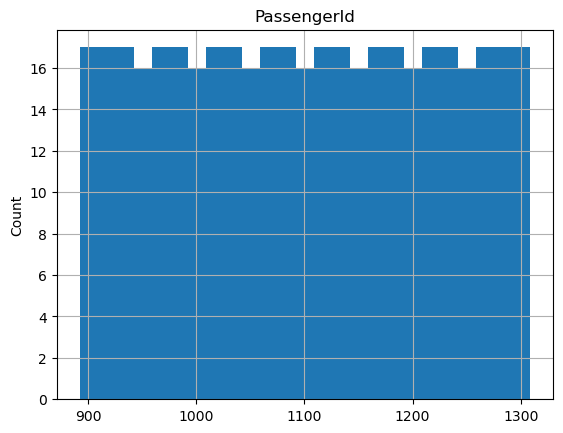

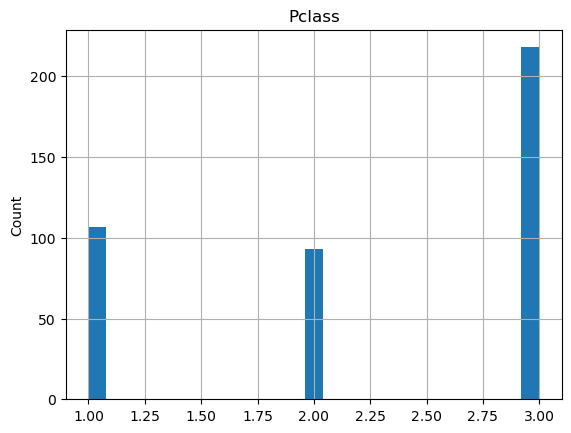

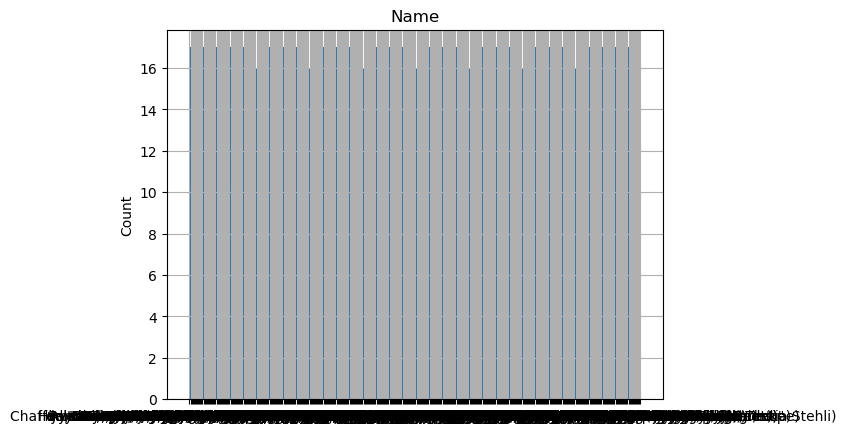

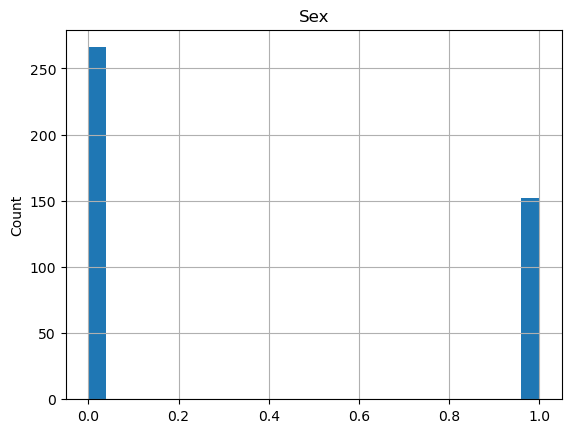

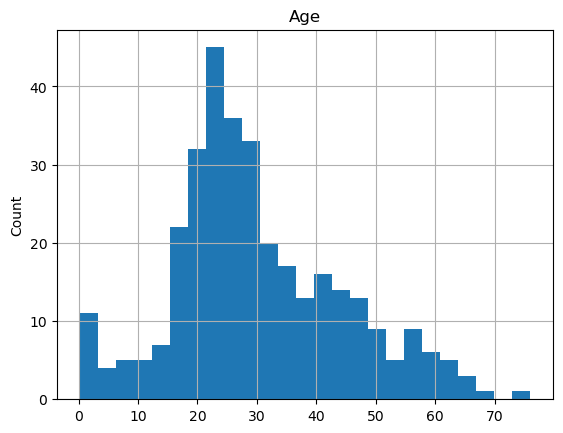

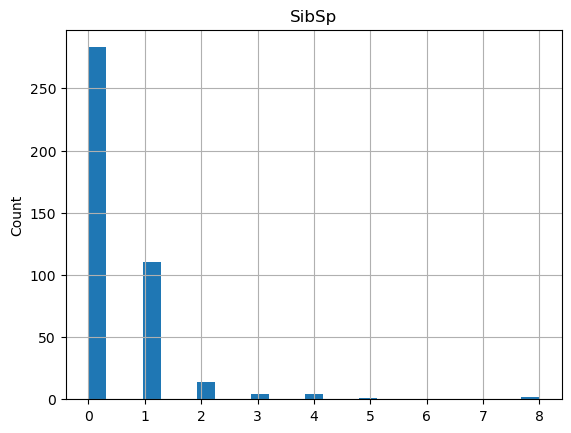

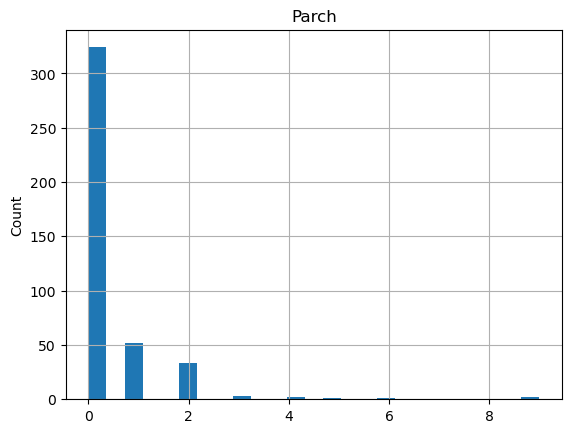

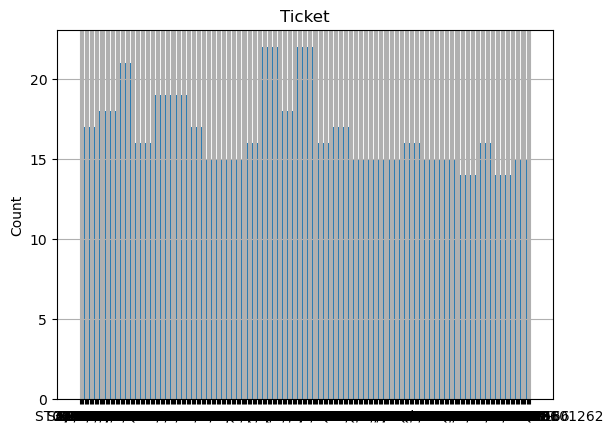

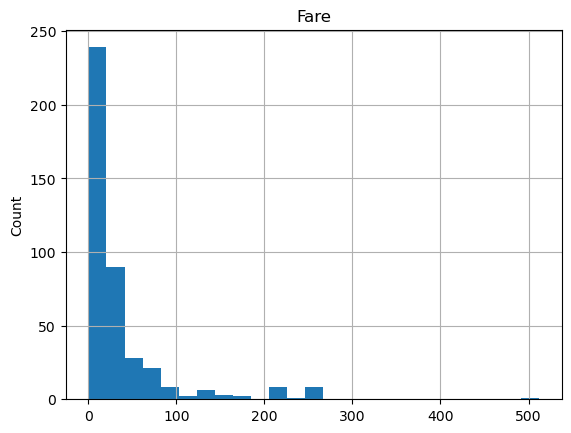

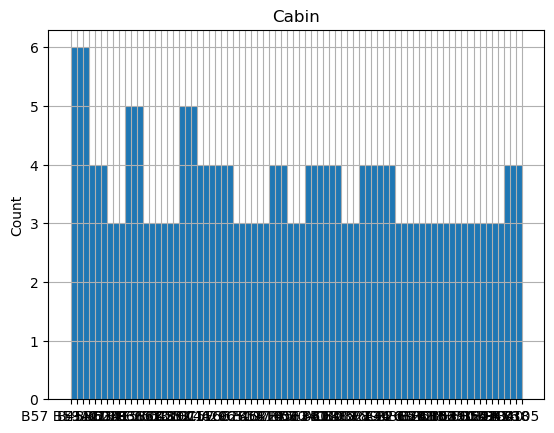

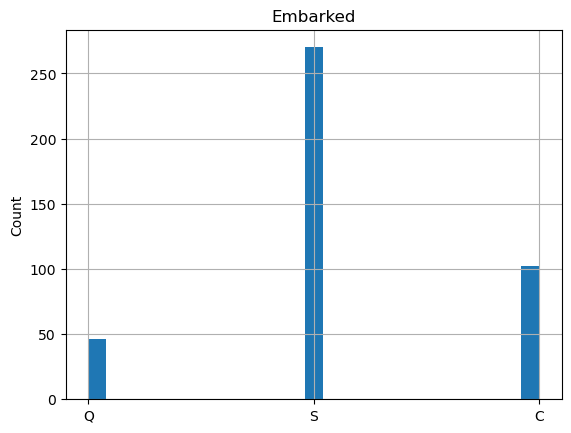

In [11]:
for feature in df.columns:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

<Axes: >

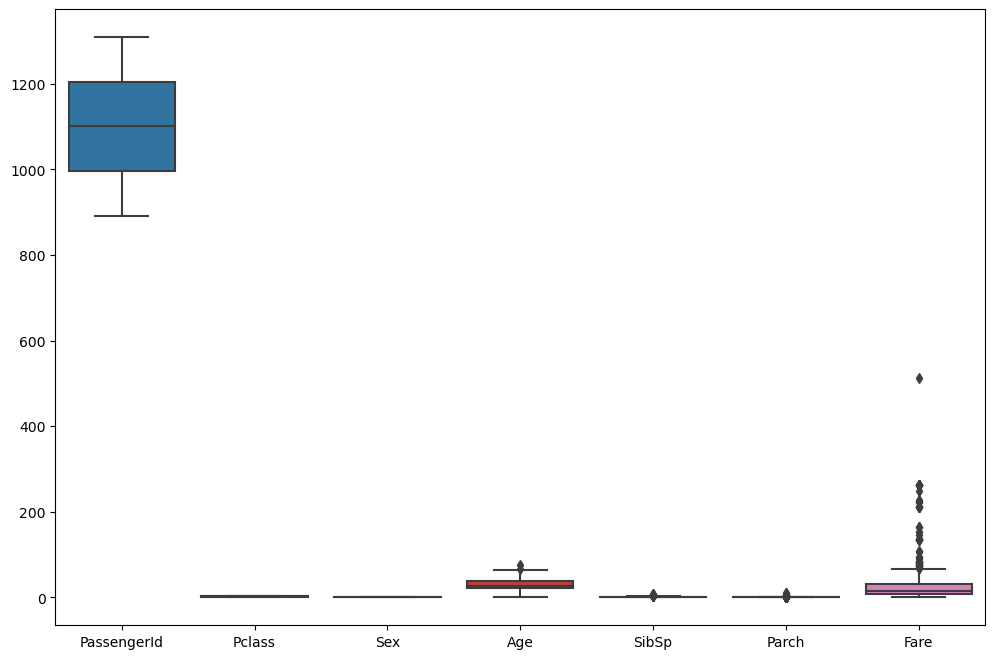

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
df=pd.read_csv(r'C:\Users\aaksh\OneDrive\Desktop\ttren.csv')

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
features=df.drop('Name', axis=1)
features

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [10]:
null_count_col = df.isnull().sum().value_counts(ascending=False)
print("Null Count for Columns:\n\n", null_count_col, "\n")

Null Count for Columns:

 0      9
177    1
687    1
2      1
Name: count, dtype: int64 



In [11]:
null_count_row = df.isnull().sum(axis=1).value_counts(ascending=False)
print("Null Count for Rows:\n\n", null_count_row, "\n")

Null Count for Rows:

 1    550
0    183
2    158
Name: count, dtype: int64 



In [12]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


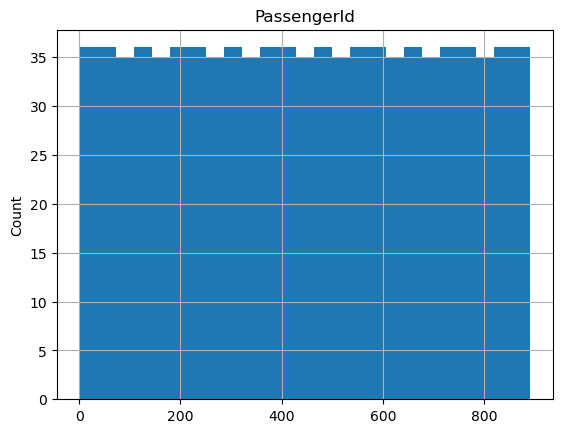

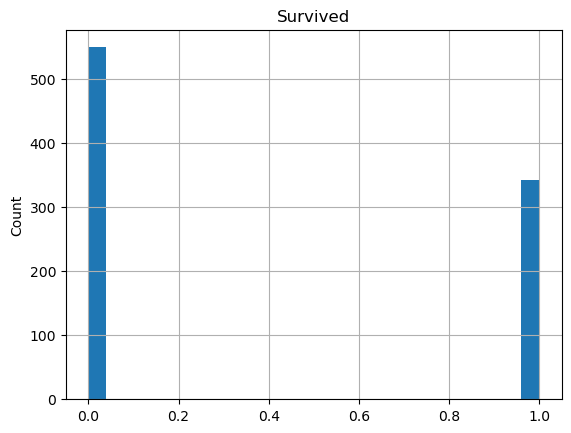

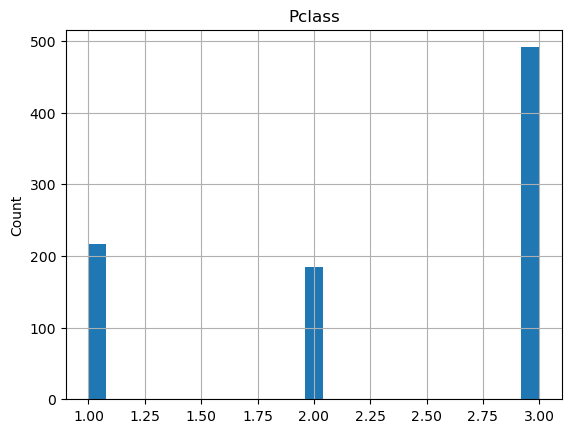

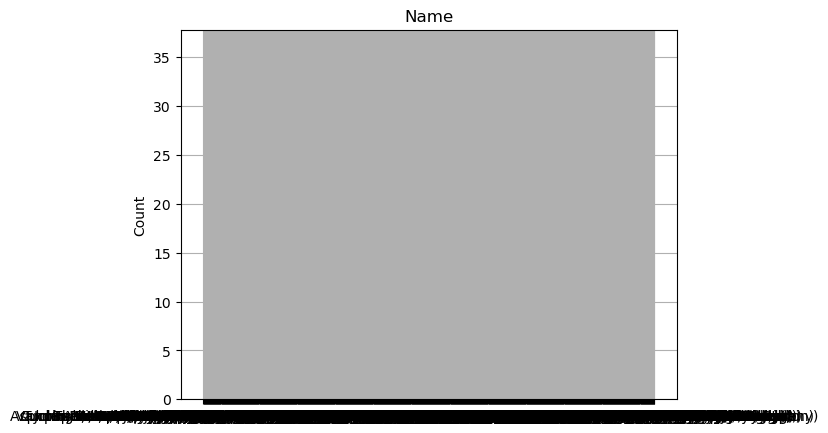

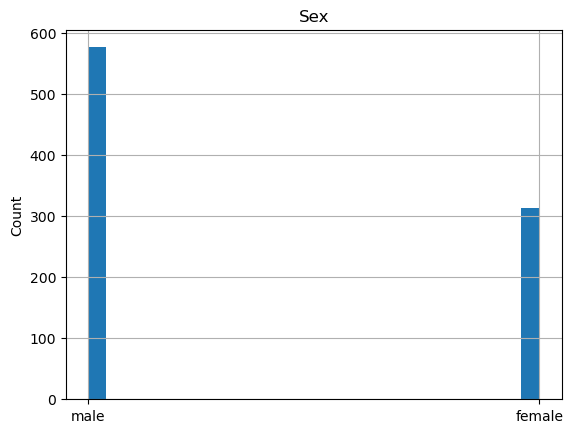

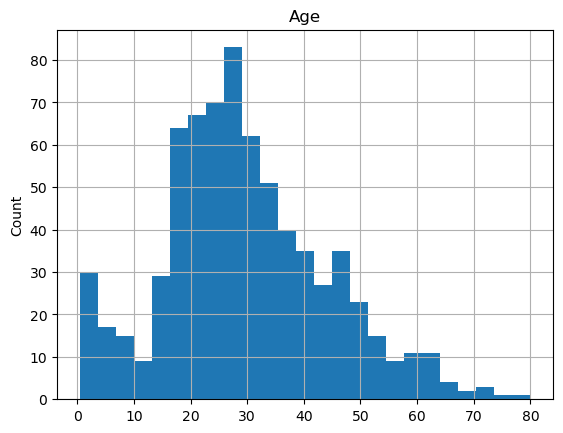

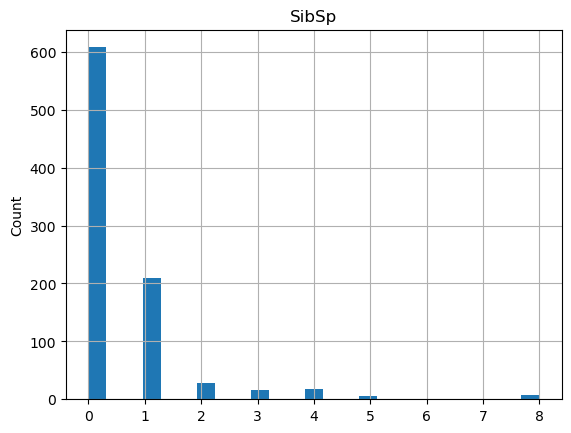

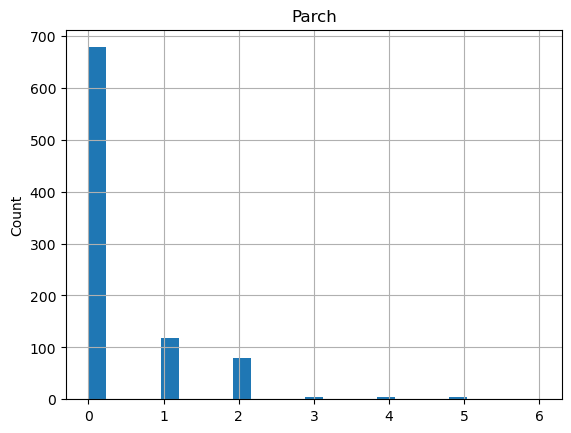

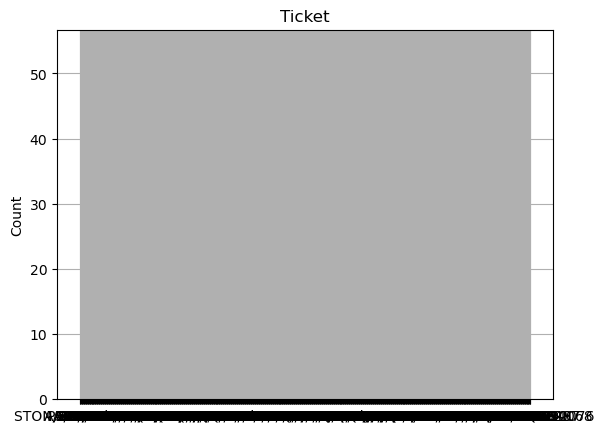

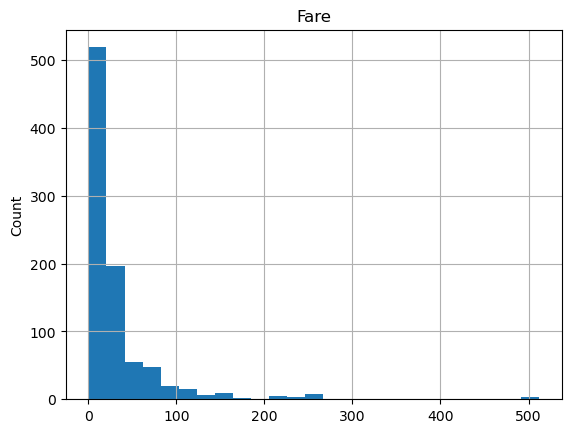

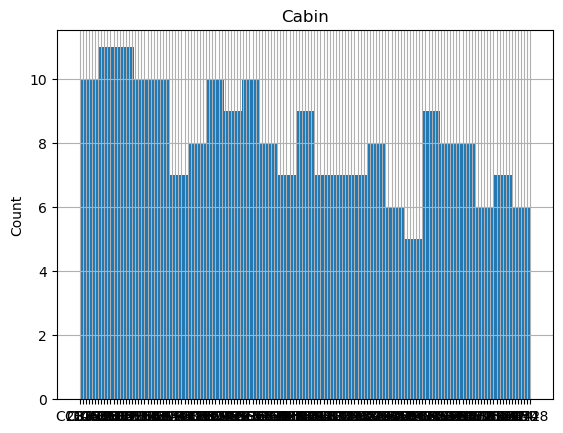

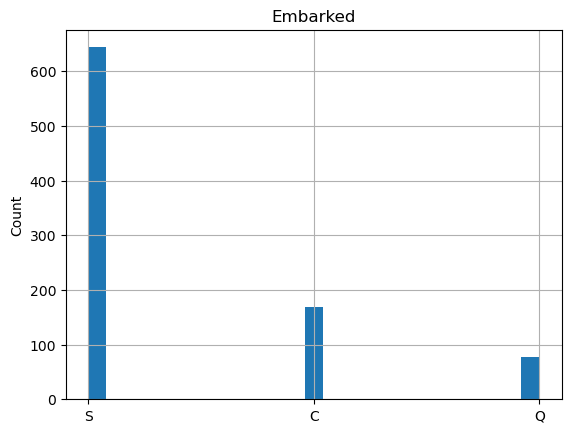

In [13]:
for feature in df.columns:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

<Axes: >

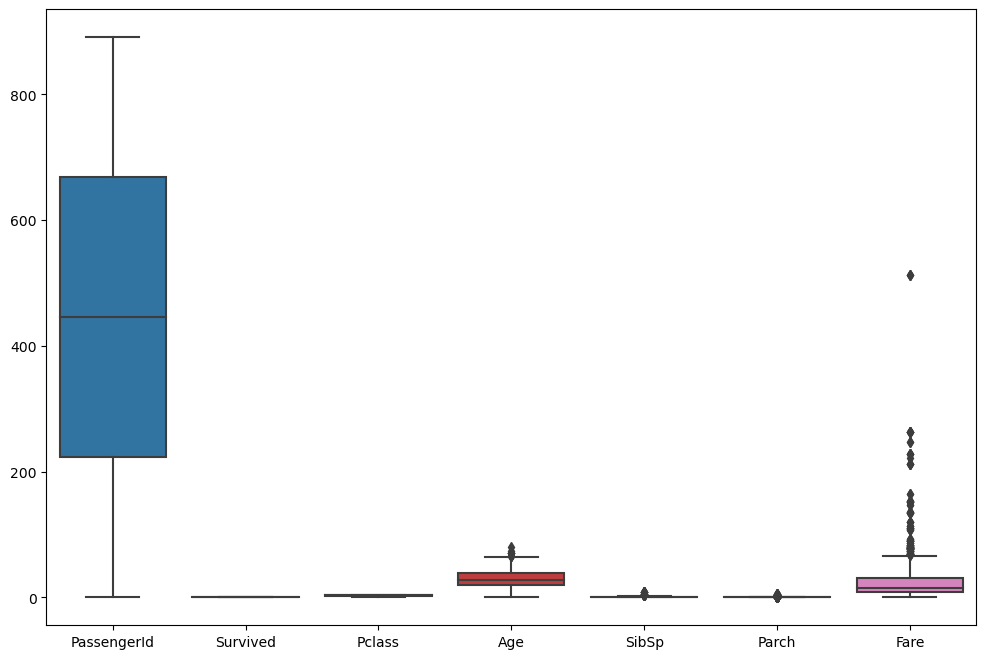

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data)

In [21]:
pip install lightgbm


  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 1.6 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.3 MB 13.5 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 14.1 MB/s eta 0:00:00


In [22]:
import lightgbm as lgb

In [23]:
param = {
    'objective': 'binary',
    'metric': 'binary_logloss',  # Classification metric (log loss)
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [30]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

In [37]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
data_ = df.copy()
data_.drop('Fare',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,3,22.0,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,38.0,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,35.0,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,35.0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
data_['Fare'] = df.Fare
data_.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Fare
0,1,0,3,22.0,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,7.2500
1,2,1,1,38.0,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,71.2833
2,3,1,3,26.0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,7.9250
3,4,1,1,35.0,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,53.1000
4,5,0,3,35.0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,8.0500


In [41]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
le.fit(data_["Fare"])
data_["Fare"]=le.transform(data_["Fare"])
data_.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Fare
0,1,0,3,22.0,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,18
1,2,1,1,38.0,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,207
2,3,1,3,26.0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,41
3,4,1,1,35.0,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,189
4,5,0,3,35.0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,43


In [43]:
model_data = data_[['Age', 'PassengerId','Survived', 'Pclass',  'SibSp','Parch','Fare']]
model_data.head()

,Age,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,22.0,1,0,3,1,0,18
1,38.0,2,1,1,1,0,207
2,26.0,3,1,3,0,0,41
3,35.0,4,1,1,1,0,189
4,35.0,5,0,3,0,0,43


In [45]:
x = model_data.drop('Fare',axis=1)
y = model_data['Fare']

In [46]:
y.unique()

array([ 18, 207,  41, 189,  43,  51, 186, 124,  74, 154, 110, 143, 158,
        36, 108, 151,  85, 113,  16, 138,  42, 168, 159, 246,  38,  40,
       145, 236,  30,  72, 220, 187,  17,  75,  62, 123, 177, 102, 125,
       112, 175,  34, 211, 200, 146, 179, 218, 222, 147, 101,  46,  54,
       208,  94, 193,  24, 150,  81,  58,  64,  32, 180, 106, 165, 198,
       122, 166, 201, 129, 212,  53,  31, 133,  66,  95, 244,  15, 127,
        10,  12,  96,  98, 140,  59, 216,   7,  76, 169,  33,  82, 203,
        19, 199,  27, 205, 109, 105, 121, 190, 136, 163, 156, 134, 149,
         0,  99, 172, 126, 183,  49,   6,  71, 115, 157, 231, 144, 210,
       225,  61,  87,  22, 139,  78,  14, 188, 119, 223, 247, 217, 238,
       235, 117, 152, 213, 120, 215, 226,  84,  57, 237, 155, 130,  80,
       230, 229, 132, 194, 221, 245,  91, 239, 234,   3, 196, 148, 233,
       107,  60, 167, 209, 204, 191, 241,   1, 243, 104,  26,  77, 232,
        83, 114,   8, 161,  37,  93, 192,  44, 219, 116, 118, 22

In [47]:
x = df.drop('Pclass',axis=1)
y = df['Pclass']

In [48]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
for train_ix, test_ix in skf.split(x, y):
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
    train, train1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test, test1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train, train1, test, test1))

>Train: 0=0, 1=195, Test: 0=0, 1=21
>Train: 0=0, 1=194, Test: 0=0, 1=22
>Train: 0=0, 1=194, Test: 0=0, 1=22
>Train: 0=0, 1=194, Test: 0=0, 1=22
>Train: 0=0, 1=194, Test: 0=0, 1=22
>Train: 0=0, 1=194, Test: 0=0, 1=22
>Train: 0=0, 1=194, Test: 0=0, 1=22
>Train: 0=0, 1=195, Test: 0=0, 1=21
>Train: 0=0, 1=195, Test: 0=0, 1=21
>Train: 0=0, 1=195, Test: 0=0, 1=21


In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [50]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (623, 11)
Shape of X_test:  (268, 11)
Shape of y_train:  (623,)
Shape of y_test (268,)
